### 모델
- 피 쳐 : 33개
- 타 겟 : G3

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder, LabelEncoder,RobustScaler,PolynomialFeatures, OrdinalEncoder
import heejin
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

1. school 학교
2. sex 성별
3. age 나이 -> 15~22
4. address 주소 -> U(도시), R(농촌)
5. famsize 가족 크기
6. Pstatus 부모의 동거 여부 ->  T:동거 A:동거 X
7. Medu 어머니의 교육 -> 0:없음 1:초등교육(4학년) 2:5-9학년 3:중등교육 4:고등교육
8. Fedu 아버지의 교육 -> 0:없음 1:초등교육(4학년) 2:5-9학년 3:중등교육 4:고등교육
9. Mjob 어머니의 직업 -> nominal(교사,건강관리 관련), services(행정,경찰)
10. Fjob 아버지의 직업 -> nominal(교사,건강관리 관련), services(행정,경찰)
11. reason 본 학교를 선택한 이유 -> 집에 가까운, 학교 평판, 과정, 선호, 기타
12. guardian 학생의 보호자 -> mother, father, 기타
13. traveltime 이동 시간 -> 15분 이상 -> yes , no
14. studytime 학습 시간 -> 1:2시간이하 2:2-5시간 3:5-10시간 4:10시간이상
15. failures 낙제 횟수 -> 1,2,3 or 4(1,2,3 아니면 4)
16. schoolsup 추가교육(보충수업?)
17. famsup 가족 교육 지원
18. paid 수학 공부 추가 지원 여부
19. activities 과외 활동
20. nursery 유치원 다닌 유무
21. higher 고등교육 희망 유무
22. internet 인터넷 접속
23. romantic 이성교제
24. famrel 가족관계 -> 1:매우나쁨 2:나쁨 3:보통 4:좋음 5:매우좋음
25. freetime 자유시간 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
26. goout 외출 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
27. Dalc 일과 중 음주 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
28. Walc 주말 음주 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
29. health 현재 건강 상태 -> 1:매우나쁨 2:나쁨 3:보통 4:좋음 5:매우좋음
30. absences 결석 횟수 -> 0~93
31. G1 1학기 수학 성적 -> 0~20
32. G2 2학기 수학 성적 -> 0~20
33. G3 최종 성적 -> 0~20
  
24-29 : 순서가 있는 범주형 데이터 : 순서형 데이터
나머지 순서가 없는 범주형 데이터 : 명목형 데이터
범주형 데이터 인코딩 실시

In [ ]:
stuDF = pd.read_csv('../data/student-mat.csv', sep = ';')
stuDF.head()

stuDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
## 처음부터 다시 시도
# 순서가 있는 범주형 데이터 인코딩
la_encoder = LabelEncoder()
for i in range(23,30):
    stuDF[stuDF.columns[i]] = la_encoder.fit_transform(stuDF[stuDF.columns[i]])

# 순서가 없는 범주형 데이터 인코딩
one_encoder = OneHotEncoder()
for i in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian','schoolsup', 'famsup', 'paid','activities', 'nursery', 'higher','internet', 'romantic','Mjob','Fjob']:
    encoded_data = one_encoder.fit_transform(stuDF[[i]]).toarray()
    encoded_df = pd.DataFrame(encoded_data, columns=[f'{i}_{category}' for category in one_encoder.categories_[0]])
    # one_encoder.categories_[0] : 객체에 의해 인코딩된 카테고리의 목록
    stuDF = pd.concat([stuDF, encoded_df], axis=1)
    stuDF.drop(columns=[i], inplace=True)

In [ ]:
stuDF.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,18,4,4,2,2,0,3,2,3,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,17,1,1,1,2,0,4,2,2,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15,1,1,1,2,3,3,2,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,15,4,2,1,3,0,2,1,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16,3,3,1,2,0,3,2,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
stuDF.corr(numeric_only=True)['G3'].abs().sort_values(ascending=False)

# G2, G1, failures, Medu, higher 선택
# failures는 음의 상관관계

G3                   1.000000
G2                   0.904868
G1                   0.801468
failures             0.360415
Medu                 0.217147
higher_yes           0.182465
higher_no            0.182465
age                  0.161579
Fedu                 0.152457
goout                0.132791
romantic_no          0.129970
romantic_yes         0.129970
traveltime           0.117142
Mjob_health          0.116158
Mjob_at_home         0.115634
address_R            0.105756
address_U            0.105756
sex_M                0.103456
sex_F                0.103456
paid_yes             0.101996
paid_no              0.101996
reason_course        0.098950
internet_no          0.098483
internet_yes         0.098483
studytime            0.097820
Mjob_other           0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other       0.087774
schoolsup_no         0.082788
schoolsup_yes        0.082788
famsize_GT3          0.081407
famsize_LE3          0.081407
Mjob_servi

In [ ]:
targetSR = stuDF['G3']
featureDF = stuDF[['G2','G1','failures','Medu','higher_yes']]

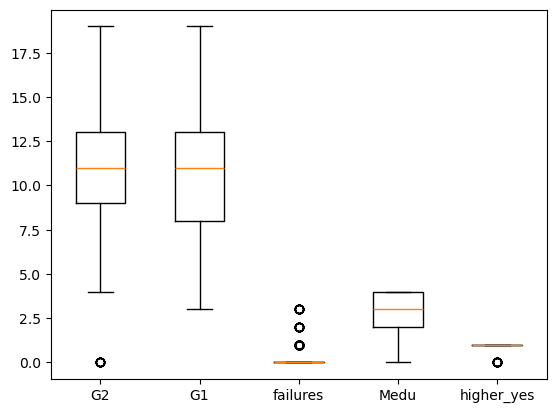

In [ ]:
plt.boxplot(featureDF)
plt.xticks(np.arange(1,6),featureDF.columns)
plt.show()
# 스케일링 진행

In [ ]:
for i in featureDF.columns:
    print(i)
    print(featureDF[i].unique())

G2
[ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G1
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
failures
[0 3 2 1]
Medu
[4 1 3 2 0]
higher_yes
[1. 0.]


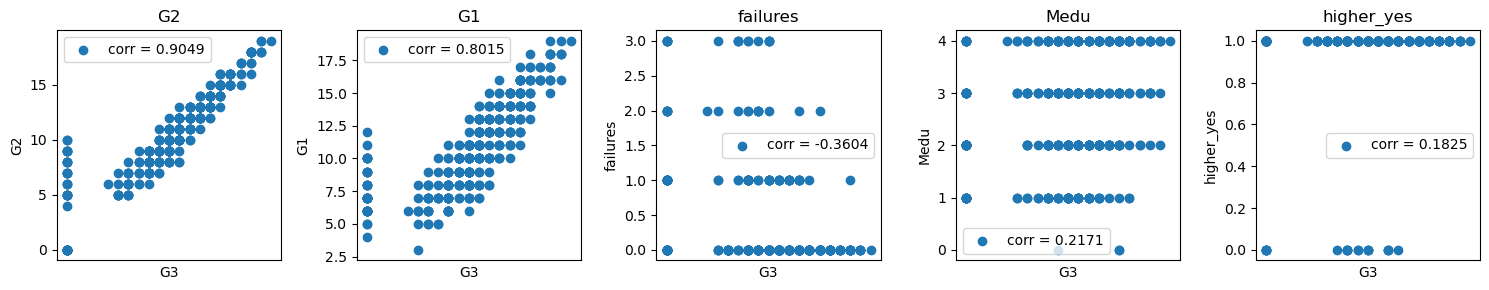

In [ ]:
# 선형 관계 파악
plt.figure(figsize=(15,3))
heejin.print_scatter(1,5,targetSR,featureDF)

In [ ]:
# 최적 random_state 값
random_state_list = []
for i in range(1,51):
    xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2,random_state=i)
    scaler = StandardScaler() # scaler 종류에 따른 큰 차이 없음
    scaler.fit(xtrain)
    xtrain_scaled = scaler.transform(xtrain)
    xtest_scaled = scaler.transform(xtest)
    model = LinearRegression() # model 종류에 따라 차이남
    model.fit(xtrain_scaled,ytrain)
    model.score(xtest_scaled,ytest)
    random_state_list.append(model.score(xtest_scaled,ytest))
max_score = max(random_state_list)
print(f'radom_state = {random_state_list.index(max_score)+1}\nscore : {max_score}')

max_random_state = random_state_list.index(max_score)+1

radom_state = 49
score : 0.9091687806543547


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2,random_state=max_random_state)

In [ ]:
# poly 최적의 파라미터 값 찾기

max_score = []
for b in [True,False]:
    for d in range(1,6):
        poly = PolynomialFeatures(interaction_only=b, degree=d)
        poly.fit(xtrain)
        xtrain_transformed = poly.transform(xtrain)
        xtest_transformed = poly.transform(xtest)

        model = LinearRegression()
        model.fit(xtrain_transformed, ytrain)
        score = model.score(xtest_transformed, ytest)
        print(b,d,score)
        max_score.append([b,d,score])

max_element = max(max_score, key=lambda x: x[2])

b_max, d_max, score_max = max_element[0], max_element[1], max_element[2]

print(f'max score =>\ninteraction_only = {b_max}, degree = {d_max}, score = {score_max}')

True 1 0.9091687806543547
True 2 0.9039509185078319
True 3 0.6548581778844387
True 4 -9.72686714266984
True 5 -12.756150369568555
False 1 0.9091687806543547
False 2 0.9147325337248773
False 3 0.5942393476957517
False 4 -185.6434851236933
False 5 -217300.47606043975
max score =>
interaction_only = False, degree = 2, score = 0.9147325337248773


In [ ]:
poly = PolynomialFeatures()
poly.fit(xtrain)
xtrain = poly.transform(xtrain)
xtest = poly.transform(xtest)

In [ ]:
heejin.find_re_model(xtrain,ytrain,xtest,ytest)

----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=6)
scaler : StandardScaler()
Train score : 0.7848020972983751
Test score : 0.806590241900224

    [모델 설명도]
R2 : 0.806590241900224
[에러]
MAE : 1.531645569620253
MSE : 4.630801687763712
RMSE : 2.151929759021821
--------------------------------------
    
model : LinearRegression()
scaler : StandardScaler()
Train score : 0.8031418771847547
Test score : 0.9147325337248788

    [모델 설명도]
R2 : 0.9147325337248788
[에러]
MAE : 0.9325919882069081
MSE : 2.041555351795996
RMSE : 1.4288300640020128
--------------------------------------
    
----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=6)
scaler : MinMaxScaler()
Train score : 0.7864531429698243
Test score : 0.7868821253193661

    [모델 설명도]
R2 : 0.7868821253193661
[에러]
MAE : 1.5949367088607596
MSE : 5.1026722925457095
RMSE : 2.2589095361580354
--------------------------------------
    
model : LinearRegression()
scaler : MinMaxScaler()
Train 

(LinearRegression(), MinMaxScaler(), 0.914732533724879)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.914732533724879

In [ ]:
# from sklearn.metrics import classification_report
# 다중 클래스 분류에 사용
# classification_report(np.array(ytest), model.predict(xtest))

In [ ]:
# 아래는 처음에 시도 했던 것들 + G1,G2 빼고 다시 시도
stuDF = pd.read_csv('../data/student-mat.csv', sep = ';')

In [ ]:
targetSR = stuDF[stuDF.columns[-1]]
featureDF = stuDF[stuDF.columns[:-1]]

[ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


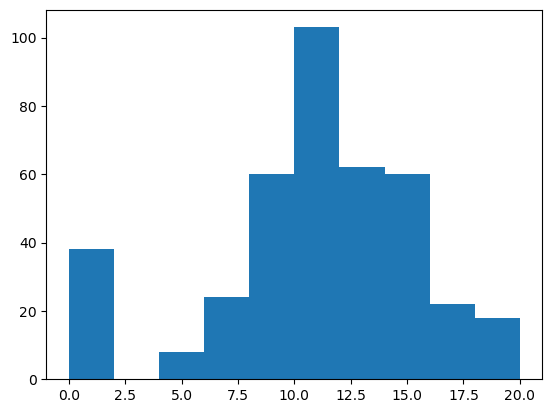

In [ ]:
plt.hist(targetSR)
print(targetSR.unique())

In [ ]:
# 범주형 타겟으로 전환해보자 -- 맨 아래에서
# A,B,C,D,F
# a = targetSR.quantile(0.8)
# b = targetSR.quantile(0.6)
# c = targetSR.quantile(0.4)
# d = targetSR.quantile(0.2)
# # d 이하 f
# targetSR = pd.cut(targetSR, bins=[0,d,c,b,a,20],labels = ['F', 'D', 'C', 'B', 'A'])

In [ ]:
# 0점인 애들 따로 DF 생성
stuDF = pd.read_csv('../data/student-mat.csv', sep = ';')

stuDF_0 = stuDF[stuDF['G3'] == 0]
stuDF = stuDF[stuDF['G3'] != 0]

targetSR = stuDF[stuDF.columns[-1]]
featureDF = stuDF[stuDF.columns[:-1]]


targetSR_0 = stuDF_0[stuDF_0.columns[-1]]
featureDF_0 = stuDF_0[stuDF_0.columns[:-1]]

In [ ]:
stuDF_0 # 얘네들도 나중에 따로 분석

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


In [ ]:
for i in stuDF.columns:
    print(f'{i} => {stuDF[i].unique()} {stuDF[i].dtype}')

# encoding - 범주형을 수치형으로 바꿔주는 작업
# 명목형 변수는 원핫 인코딩
# 범주형 중 두개로 나누어 지는 경우는 0과 1로 변환
# ex) yes => 1 / no => 0

# 성적과 비례할 것 같은 값을 1로 변환 / 반비례할 것 같은 값을 0으로 변환
# Mjob -> at_home : 1, 그 외 : 0
# Fjob -> at_home : 0, 그 외 : 1
# school, sex, adress, famsize, Pstatus, reason, guardian - onehotencoding
# yes -> 1
# schoolsup, famsup, paid,activities, nursery, higher
# no -> 1
# internet, romantic

school => ['GP' 'MS'] object
sex => ['F' 'M'] object
age => [18 17 15 16 19 22 20 21] int64
address => ['U' 'R'] object
famsize => ['GT3' 'LE3'] object
Pstatus => ['A' 'T'] object
Medu => [4 1 3 2 0] int64
Fedu => [4 1 2 3 0] int64
Mjob => ['at_home' 'health' 'other' 'services' 'teacher'] object
Fjob => ['teacher' 'other' 'services' 'health' 'at_home'] object
reason => ['course' 'other' 'home' 'reputation'] object
guardian => ['mother' 'father' 'other'] object
traveltime => [2 1 3 4] int64
studytime => [2 3 1 4] int64
failures => [0 3 2 1] int64
schoolsup => ['yes' 'no'] object
famsup => ['no' 'yes'] object
paid => ['no' 'yes'] object
activities => ['no' 'yes'] object
nursery => ['yes' 'no'] object
higher => ['yes' 'no'] object
internet => ['no' 'yes'] object
romantic => ['no' 'yes'] object
famrel => [4 5 3 1 2] int64
freetime => [3 2 4 1 5] int64
goout => [4 3 2 1 5] int64
Dalc => [1 2 5 3 4] int64
Walc => [1 3 2 4 5] int64
health => [3 5 1 2 4] int64
absences => [ 6  4 10  2  0 16 14

In [ ]:
# 범주형 피쳐 개수 확인
(featureDF.dtypes == 'O').sum(),(featureDF.dtypes == 'int64').sum()

(17, 15)

In [ ]:
len(featureDF['sex'].unique())

2

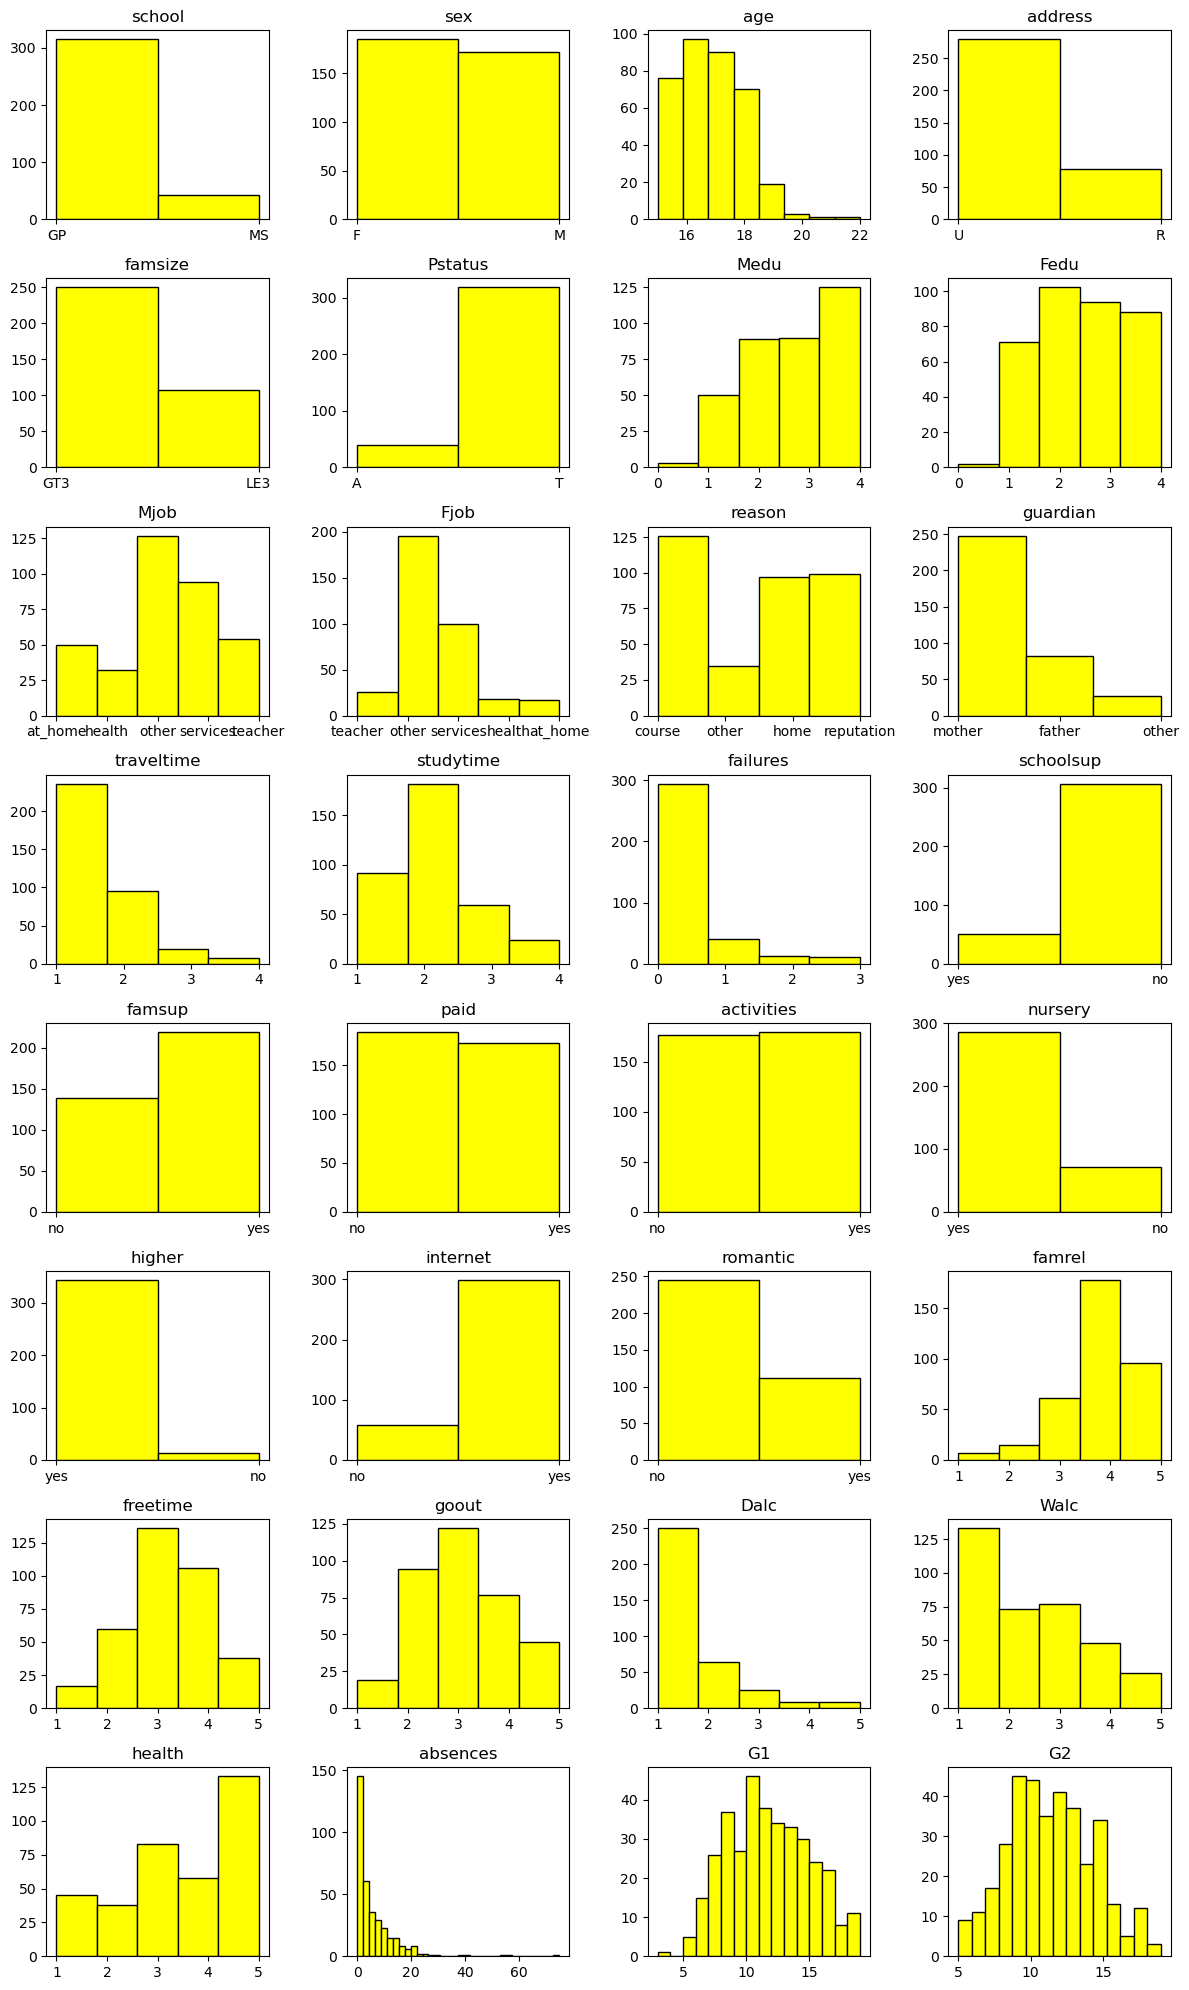

In [ ]:
# hist맵 그리기
plt.figure(figsize = (12,20))
for n,i in enumerate(featureDF.columns):
    plt.subplot(8,4,n+1)
    plt.hist(stuDF[i], bins = len(featureDF[i].unique()),edgecolor='k', color = 'yellow')
    plt.title(f'{i}')
plt.tight_layout()
plt.show()

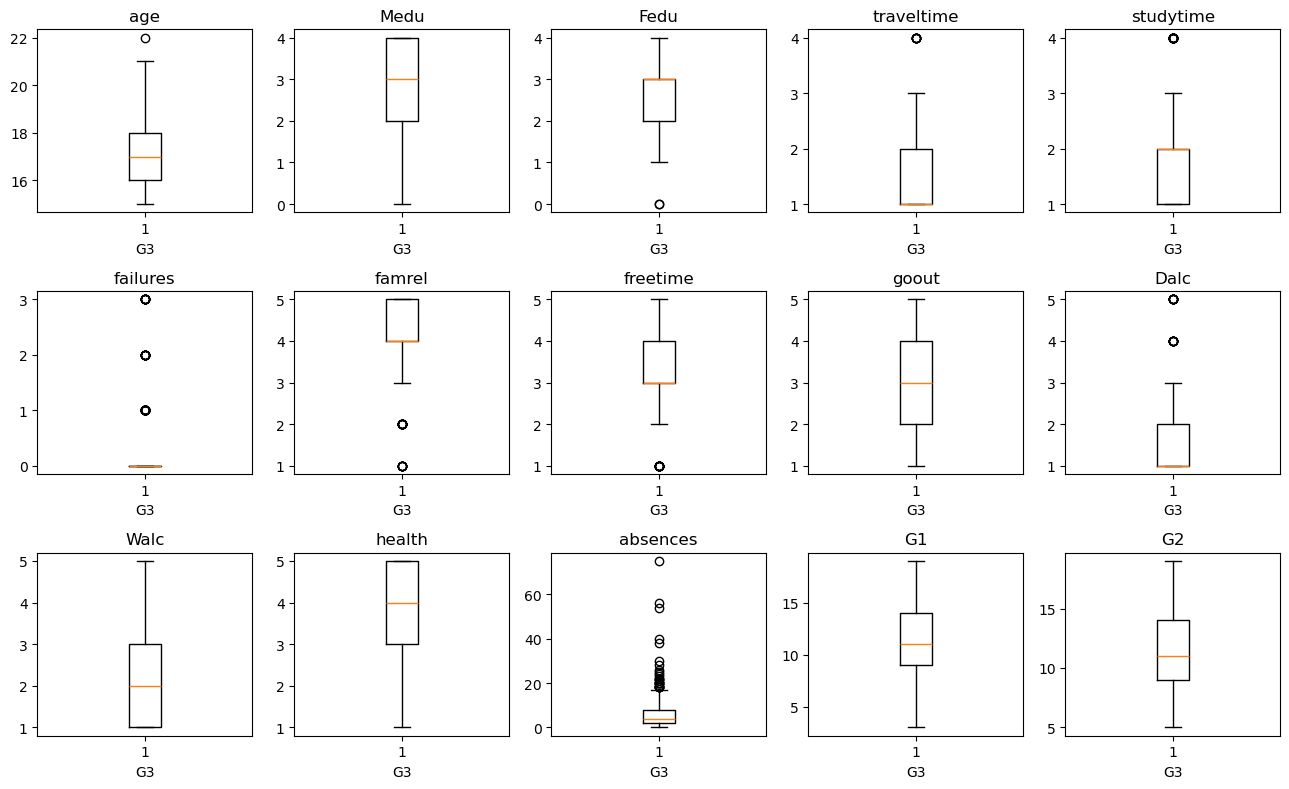

In [ ]:
# int형인 데이터 boxplot
plt.figure(figsize = (13,8))
n = 1
for i in featureDF.columns:
    if featureDF[i].dtypes == 'int64':
        plt.subplot(3,5,n)
        plt.boxplot(stuDF[i])
        plt.xlabel(targetSR.name)
        plt.title(f'{i}')
        n+=1
plt.tight_layout()
plt.show()

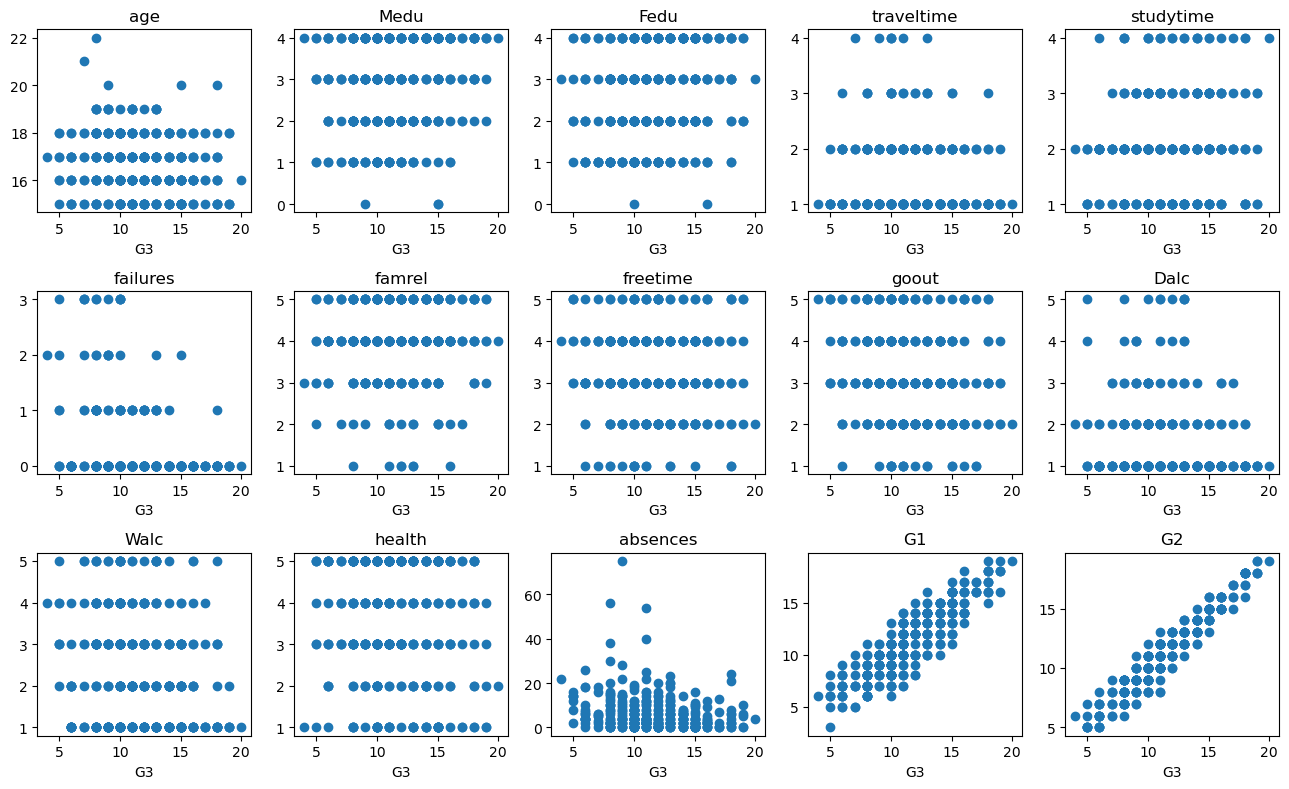

In [ ]:
# scatter 그리기
plt.figure(figsize = (13,8))
n = 1
for i in featureDF.columns:
    if featureDF[i].dtypes == 'int64':
        plt.subplot(3,5,n)
        plt.scatter(targetSR,stuDF[i])
        plt.xlabel(targetSR.name)
        plt.title(f'{i}')
        n+=1
plt.tight_layout()
plt.show()
# age, failures, G1, G2
# 선형성을 띠는 데이터가 보이지 않음 -> 비선형모델로 해보자 -> 다항회귀

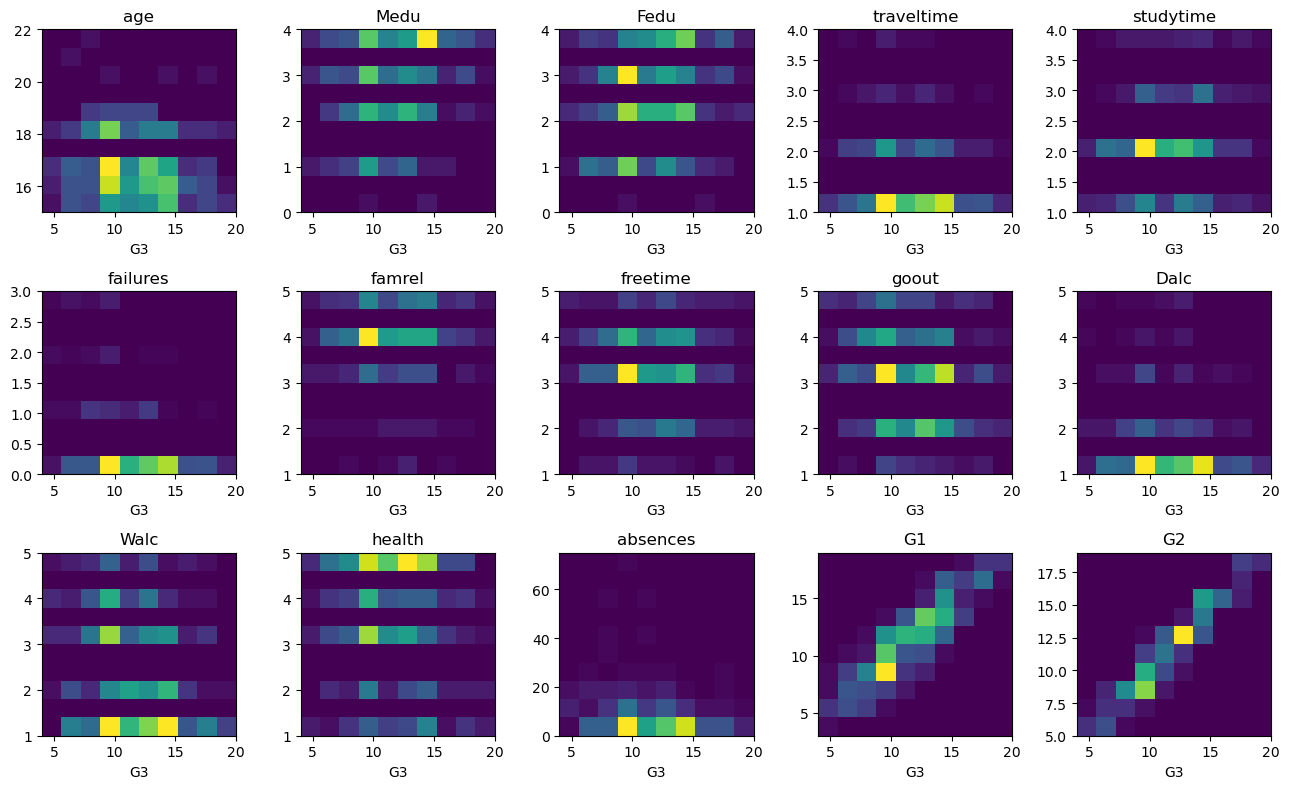

In [ ]:
plt.figure(figsize = (13,8))
n = 1
for i in featureDF.columns:
    if featureDF[i].dtypes == 'int64':
        plt.subplot(3,5,n)
        plt.hist2d(targetSR,stuDF[i])
        plt.xlabel(targetSR.name)
        plt.title(f'{i}')
        n+=1
plt.tight_layout()
plt.show()

In [ ]:
# 성적과 비례할 것 같은 값을 1로 변환 / 반비례할 것 같은 값을 0으로 변환
# Mjob -> at_home : 1, 그 외 : 0
# Fjob -> at_home : 0, 그 외 : 1
# school, sex, adress, famsize, Pstatus, reason, guardian - onehotencoding
# yes -> 1
# schoolsup, famsup, paid,activities, nursery, higher
# no -> 1
# internet, romantic

In [ ]:
# stuDF.loc[:, 'Mjob'] = (stuDF['Mjob'] == 'at_home').astype(int)
# stuDF.loc[:, 'Fjob'] = (stuDF['Fjob'] != 'at_home').astype(int)
# for i in ['schoolsup', 'famsup', 'paid','activities', 'nursery', 'higher']:
#     stuDF.loc[:,i] = (stuDF[i] == 'yes').astype(int)
# for i in ['internet', 'romantic']:
#     stuDF.loc[:,i] = (stuDF[i] != 'yes').astype(int)
# encoded_df = pd.get_dummies(stuDF, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian'])

In [ ]:
stuDF.loc[featureDF['Mjob'] != 'at_home', 'Mjob'] = 'other'
stuDF.loc[featureDF['Fjob'] != 'at_home', 'Fjob'] = 'other'


encoded_df = pd.get_dummies(stuDF, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian',
                                           'schoolsup', 'famsup', 'paid','activities', 'nursery', 'higher',
                                            'internet', 'romantic','Mjob','Fjob'], drop_first=True)
encoded_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Mjob_other,Fjob_other
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,False,True,True,False,False,False,True
1,17,1,1,1,2,0,5,3,3,1,...,False,True,False,False,False,True,True,False,False,True
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,True,True,False,False,True
3,15,4,2,1,3,0,3,2,2,1,...,False,True,True,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,True,True,False,True,True,False,False,True,True
5,16,4,3,1,2,0,5,4,2,1,...,False,True,True,True,True,True,True,False,True,True
6,16,2,2,1,2,0,4,4,4,1,...,False,False,False,False,True,True,True,False,True,True
7,17,4,4,2,2,0,4,1,4,1,...,True,True,False,False,True,True,False,False,True,True
8,15,3,2,1,2,0,4,2,2,1,...,False,True,True,False,True,True,True,False,True,True
9,15,3,4,1,2,0,5,5,1,1,...,False,True,True,True,True,True,True,False,True,True


In [ ]:
encoded_df.shape

(357, 36)

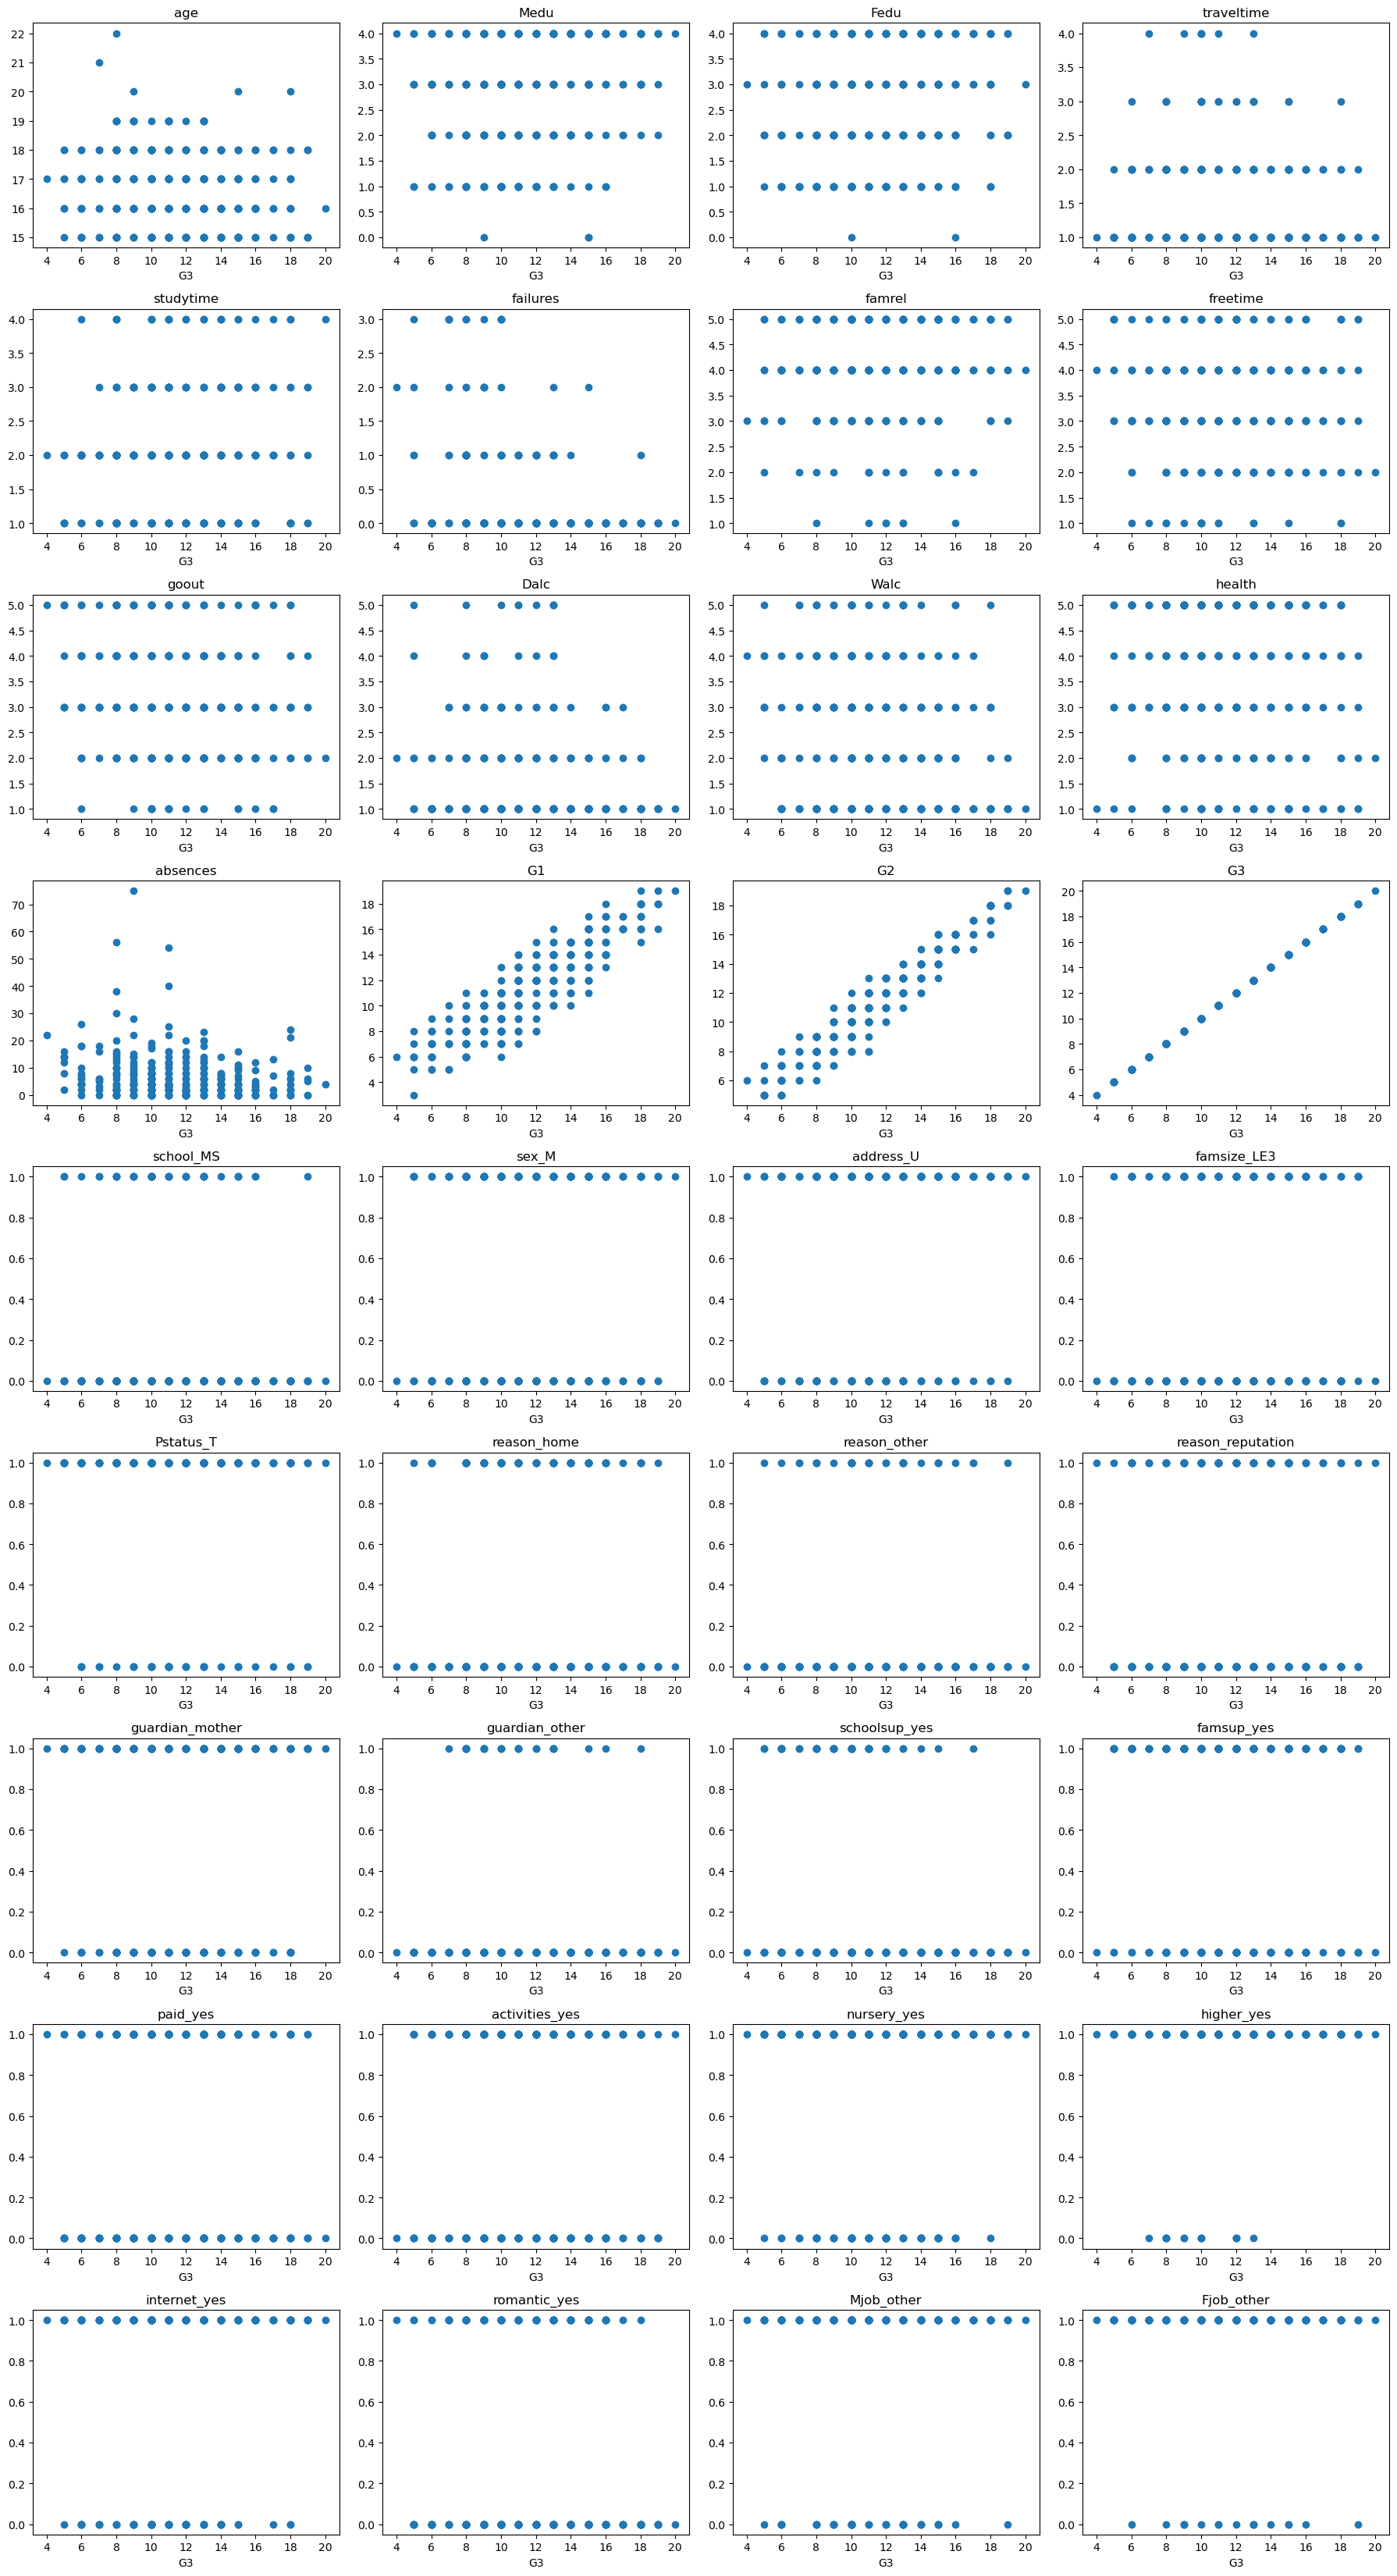

In [ ]:
n = 1
plt.figure(figsize=(18,40))
for i in encoded_df.columns:
    plt.subplot(11,4,n)
    plt.scatter(targetSR,encoded_df[i])
    plt.xlabel(targetSR.name)
    plt.title(f'{i}')
    n+=1
plt.tight_layout()
plt.show()

In [ ]:
# encoded_df = pd.get_dummies(stuDF, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian'], drop_first=True)
encoded_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Mjob_other,Fjob_other
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,False,True,True,False,False,False,True
1,17,1,1,1,2,0,5,3,3,1,...,False,True,False,False,False,True,True,False,False,True
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,True,True,False,False,True
3,15,4,2,1,3,0,3,2,2,1,...,False,True,True,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,True,True,False,True,True,False,False,True,True
5,16,4,3,1,2,0,5,4,2,1,...,False,True,True,True,True,True,True,False,True,True
6,16,2,2,1,2,0,4,4,4,1,...,False,False,False,False,True,True,True,False,True,True
7,17,4,4,2,2,0,4,1,4,1,...,True,True,False,False,True,True,False,False,True,True
8,15,3,2,1,2,0,4,2,2,1,...,False,True,True,False,True,True,True,False,True,True
9,15,3,4,1,2,0,5,5,1,1,...,False,True,True,True,True,True,True,False,True,True


In [ ]:
encoded_df.corr()['G3'].abs().sort_values(ascending=False) # failures, schoolsup_yes, absences, Medu, Walc, goout
encoded_df.corr()['G3'].sort_values(ascending=True) # Medu를 제외하고 모두 음의 상관관계

failures            -0.293831
schoolsup_yes       -0.238365
absences            -0.213129
Walc                -0.190054
goout               -0.177383
Dalc                -0.140690
age                 -0.140372
traveltime          -0.099785
school_MS           -0.083615
health              -0.081691
guardian_other      -0.069491
famsup_yes          -0.067305
romantic_yes        -0.049944
Fjob_other          -0.028954
paid_yes            -0.028899
Pstatus_T           -0.026665
freetime            -0.021589
reason_other        -0.003897
reason_home          0.000372
guardian_mother      0.007728
nursery_yes          0.026541
famrel               0.037711
famsize_LE3          0.039744
reason_reputation    0.056573
activities_yes       0.058600
Mjob_other           0.090624
sex_M                0.102448
internet_yes         0.111624
higher_yes           0.113419
studytime            0.126728
address_U            0.130090
Fedu                 0.158811
Medu                 0.190308
G1        

In [ ]:
featureDF= encoded_df[['failures', 'schoolsup_yes','absences','Medu','Walc','goout']]

In [ ]:
# 최적 random_state 값
random_state_list = []
for i in range(1,51):
    xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2,random_state=i)
    scaler = StandardScaler() # scaler 종류에 따른 큰 차이 없음
    scaler.fit(xtrain)
    xtrain_scaled = scaler.transform(xtrain)
    xtest_scaled = scaler.transform(xtest)
    model = LinearRegression() # model 종류에 따라 차이남
    model.fit(xtrain_scaled,ytrain)
    model.score(xtest_scaled,ytest)
    random_state_list.append(model.score(xtest_scaled,ytest))
max_score = max(random_state_list)
print(f'radom_state = {random_state_list.index(max_score)+1}\nscore : {max_score}')

max_random_state = random_state_list.index(max_score)+1

radom_state = 15
score : 0.35095074960175443


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2, random_state=max_random_state)

In [ ]:
# poly 최적의 파라미터 값 찾기

max_score = []
for b in [True,False]:
    for d in range(1,6):
        poly = PolynomialFeatures(interaction_only=b, degree=d)
        poly.fit(xtrain)
        xtrain_transformed = poly.transform(xtrain)
        xtest_transformed = poly.transform(xtest)

        model = LinearRegression()
        model.fit(xtrain_transformed, ytrain)
        score = model.score(xtest_transformed, ytest)
        print(b,d,score)
        max_score.append([b,d,score])

max_element = max(max_score, key=lambda x: x[2])

b_max, d_max, score_max = max_element[0], max_element[1], max_element[2]

print(f'max score =>\ninteraction_only = {b_max}, degree = {d_max}, score = {score_max}')

True 1 0.35095074960175565
True 2 0.3338950803001596
True 3 0.2322873866772185
True 4 -1.2348152029393593
True 5 -0.9618683787515543
False 1 0.35095074960175565
False 2 0.08549783929554078
False 3 -25.02843778834116
False 4 -592.529900687015
False 5 -13464.939552518612
max score =>
interaction_only = True, degree = 1, score = 0.35095074960175565


In [ ]:
poly = PolynomialFeatures(interaction_only=b_max, degree=d_max)
poly.fit(xtrain)
xtrain_poly = poly.transform(xtrain)
xtest_poly = poly.transform(xtest)

In [ ]:
heejin.find_re_model(xtrain_poly, ytrain, xtest_poly, ytest)

----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=33)
scaler : StandardScaler()
Train score : 0.19024316404539277
Test score : 0.2991832858867117

    [모델 설명도]
R2 : 0.2991832858867117
[에러]
MAE : 2.2108585858585865
MSE : 8.081968676665646
RMSE : 2.842880348636862
--------------------------------------
    
model : LinearRegression()
scaler : StandardScaler()
Train score : 0.17228827790617018
Test score : 0.35095074960175476

    [모델 설명도]
R2 : 0.35095074960175476
[에러]
MAE : 2.1573662106814577
MSE : 7.484975180663251
RMSE : 2.735868268148752
--------------------------------------
    
----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=33)
scaler : MinMaxScaler()
Train score : 0.1705881480655117
Test score : 0.2770348628642183

    [모델 설명도]
R2 : 0.2770348628642183
[에러]
MAE : 2.2365319865319866
MSE : 8.337389041934497
RMSE : 2.8874537298343843
--------------------------------------
    
model : LinearRegression()
scaler : MinMaxScaler()

(LinearRegression(), MinMaxScaler(), 0.350950749601755)

### 결론
아버지가 직업이 있을수록 성적이 높으며, 낙제 당한 횟수가 많을수록 - 결석 일수가 많을수록 - 보충수업을 들었던 학생일수록 - 주말음주를 많이 할수록 - 밖에 많이 나갈수록 성적이 낮다

타겟을 범주형으로 변환해서 다시 한번 더

In [3]:
stuDF = pd.read_csv('../data/student-mat.csv', sep = ';')

stuDF = stuDF[stuDF['G3'] != 0]

targetSR = stuDF[stuDF.columns[-1]]
featureDF = stuDF[stuDF.columns[:-1]]

# 범주형 타겟으로 전환해보자
# A,B,C,D,F
a = targetSR.quantile(0.8)
b = targetSR.quantile(0.6)
c = targetSR.quantile(0.4)
d = targetSR.quantile(0.2)
# d 이하 f
targetSR = pd.cut(targetSR, bins=[0,d,c,b,a,targetSR.max()],labels = [0,4,6,8,10]) # F,D,C,B,A

encoded_df = pd.get_dummies(stuDF, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian',
                                           'schoolsup', 'famsup', 'paid','activities', 'nursery', 'higher',
                                            'internet', 'romantic','Mjob','Fjob'], drop_first=True)

featureDF= encoded_df[['failures', 'schoolsup_yes','absences','Medu','Walc','goout']]

ml = heejin.find_random_state(featureDF,targetSR)

xtrain,xtest,ytrain,ytest = train_test_split(featureDF, targetSR, test_size = 0.2, random_state=ml)



b_max, d_max = heejin.find_poly_p(xtrain,ytrain,xtest,ytest)

poly = PolynomialFeatures(interaction_only=b_max, degree=d_max)
poly.fit(xtrain)
xtrain = poly.transform(xtrain)
xtest = poly.transform(xtest)

scaler = MinMaxScaler()
scaler.fit(xtest)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

model = LogisticRegression(solver='liblinear')

radom_state = 15
score : 0.3404610400218254
True 1 0.34046104002182587
True 2 0.2754849623454394
True 3 0.1316105779988419
True 4 -8.846331695794468
True 5 -3.7580282810174
False 1 0.34046104002182587
False 2 0.13748344800181023
False 3 -23.373274082984526
False 4 -675.6156772215968
False 5 -84703.47870694495
max score =>
interaction_only = True, degree = 1, score = 0.34046104002182587


In [4]:
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.metrics import classification_report

ovomodel = OneVsOneClassifier(model)
ovomodel.fit(xtrain,ytrain)
ovomodel.score(xtrain, ytrain), ovomodel.score(xtest, ytest)

(0.3298245614035088, 0.4583333333333333)

In [5]:
# 예측
ypre = ovomodel.predict(xtest)
pd.DataFrame({'Ypre': ypre, 'Y': ytest})

,Ypre,Y
139,8,8
369,8,6
183,0,0
2,0,4
227,8,6
54,0,8
24,6,0
86,8,0
322,8,6
116,8,8


In [6]:
classification_report(ytest,ypre,zero_division=1)

'              precision    recall  f1-score   support\n\n           0       0.56      0.64      0.60        22\n           4       0.33      0.14      0.20         7\n           6       0.38      0.18      0.24        17\n           8       0.42      0.79      0.55        19\n          10       1.00      0.00      0.00         7\n\n    accuracy                           0.46        72\n   macro avg       0.54      0.35      0.32        72\nweighted avg       0.50      0.46      0.40        72\n'

In [7]:
ovrmodel = OneVsRestClassifier(model)
ovrmodel.fit(xtrain, ytrain)
ovrmodel.score(xtrain, ytrain), ovrmodel.score(xtest, ytest)

(0.3298245614035088, 0.4861111111111111)

In [8]:
ypre = ovrmodel.predict(xtest)
pd.DataFrame({'Ypre': ypre, 'Y': ytest})

,Ypre,Y
139,8,8
369,8,6
183,0,0
2,0,4
227,8,6
54,0,8
24,6,0
86,8,0
322,8,6
116,8,8


In [9]:
classification_report(ytest,ypre,zero_division=1)

'              precision    recall  f1-score   support\n\n           0       0.60      0.68      0.64        22\n           4       0.33      0.14      0.20         7\n           6       0.44      0.24      0.31        17\n           8       0.43      0.79      0.56        19\n          10       1.00      0.00      0.00         7\n\n    accuracy                           0.49        72\n   macro avg       0.56      0.37      0.34        72\nweighted avg       0.53      0.49      0.43        72\n'

로지스틱회귀에서 다중분류로 ovr모델을 사용했을때 test 점수가 0.48로 나름 높다